In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import warnings

#defining parameters
length = 10
EI = [0,0,0,0,0.1,0,2] #degree 6 polynomial
xs = np.linspace(0,length,11)
mz_eiofx = []
my_eiofx = []
mx_eiofx = []


fp = [0, 1, 0]
r_p = [0,0,0] #wrt standard xyz coordinate 


In [42]:
L_p = [10,0,0]
moment_grip = np.cross(L_p,fp)
moment_head = np.cross(r_p,fp)
print(moment_grip)
print(moment_head)

[ 0  0 10]
[0 0 0]


[-0.00030794697235333866, 0.47760767118036906, 0.8313067377616369, 1.0345578371903041, 1.1129547221751612, 1.1109982150874131, 1.0696751211373163, 1.014534153354976, 0.9542588693753035, 0.8897376200271457, 0.8336305097265474]


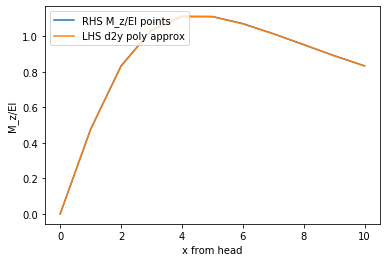

In [43]:
#y deflection
moment_z_points = []
for x in xs:
    result = ((length-x)*moment_head[2])/length+(x/length)*moment_grip[2]
    #print("m_z", result)
    moment_z_points.append(result)
    stiffness = EI[0]*x**6+EI[1]*x**5+EI[2]*x**4+EI[3]*x**3+EI[4]*x**2+EI[5]*x+EI[6]
    mz_eiofx.append(result/stiffness)
d2y_pts = np.array(mz_eiofx)

d2y = np.polyfit(xs,d2y_pts,6)
#print("m_z/EI", mz_eiofx)
#print("d2y coefficients",d2y)
d2y_approx = []
for i in xs:
    d2y_approx.append(d2y[0]*i**6+d2y[1]*i**5+d2y[2]*i**4+d2y[3]*i**3+d2y[4]*i**2+d2y[5]*i+d2y[6])
print(d2y_approx)

plt.xlabel("x from head")
plt.ylabel("M_z/EI")
plt.plot(xs,mz_eiofx, label="RHS M_z/EI points") #actual M points
plt.plot(xs,d2y_approx, label = "LHS d2y poly approx") #polynomial approximation of M
plt.legend(loc="upper left")

[-0.0006158939447066773, 1.002976109478775, 1.9951361706279285, 3.000217727851882, 4.00663699983058, 4.999491967893359, 5.990180678368971, 7.000285658149336, 8.01577450275255, 8.986349962274172, 10.003566116718568]


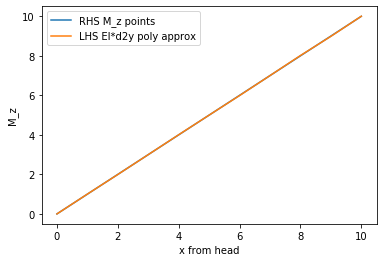

In [38]:
fx=[]
for i in range(len(xs)):
    stiffness = EI[0]*xs[i]**6+EI[1]*xs[i]**5+EI[2]*xs[i]**4+EI[3]*xs[i]**3+EI[4]*xs[i]**2+EI[5]*xs[i]+EI[6]
    fx.append(d2y_approx[i]*stiffness)
    
print(fx)
plt.xlabel("x from head")
plt.ylabel("M_z")
plt.plot(xs,moment_z_points, label="RHS M_z points") #actual M points
plt.plot(xs,fx, label = "LHS EI*d2y poly approx") #polynomial approximation of M
plt.legend(loc="upper left")

d2y [ 1.45791831e-05 -4.93005234e-04  6.14178746e-03 -3.02096230e-02
 -7.52879528e-03  5.09990675e-01 -3.07946972e-04]
[ 2.08274044e-06 -8.21675391e-05  1.22835749e-03 -7.55240574e-03
 -2.50959843e-03  2.54995337e-01 -3.07946972e-04 -8.95841291e+00]
[ 2.60342555e-07 -1.17382199e-05  2.04726249e-04 -1.51048115e-03
 -6.27399606e-04  8.49984458e-02 -1.53973486e-04 -8.95841291e+00
  4.85448861e+01]


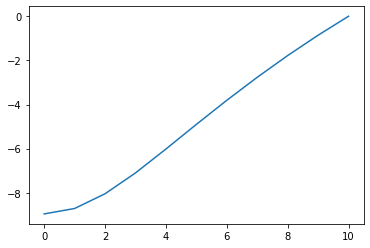

In [40]:
print("d2y", d2y)
dy = np.polyint(d2y)
dy[-1]= (-1*np.polyval(dy, length)) #boundary condition = 0
print(dy)
w_y = np.polyint(dy)
w_y[-1]= (-1*np.polyval(w_y, length))
dy_pts=[]
for i in xs:
    dy_pts.append(dy[0]*i**7+dy[1]*i**6+dy[2]*i**5+dy[3]*i**4+dy[4]*i**3+dy[5]*i**2+dy[6]*i+dy[7])
plt.plot(xs,dy_pts)    
print(w_y)
w_y_pts=[]
for i in xs:
    w_y_pts.append(w_y[0]*i**8+w_y[1]*i**7+w_y[2]*i**6+w_y[3]*i**5+w_y[4]*i**4+w_y[5]*i**3+w_y[6]*i**2+w_y[7]*i+w_y[8])

[48.542408459001535, 38.70204359160088, 29.49185401223899, 21.360356169259962, 14.53872436752652, 9.09123776249865, 4.9877049238958335, 2.1595865663020106, 0.5259720209722332, -2.842170943040401e-14]


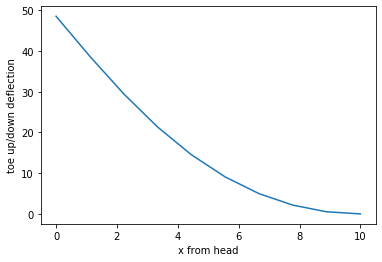

In [31]:
plt.xlabel("x from head")
plt.ylabel("toe up/down deflection")
plt.plot(xs, w_y_pts);
print(w_y_pts)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


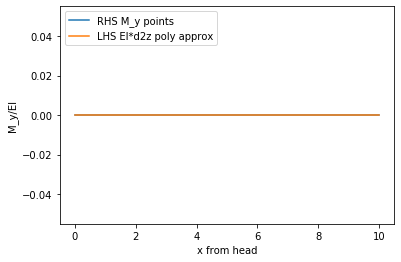

In [19]:
#z deflection
moment_y_points = []
for x in xs:
    result = ((length-x)*moment_head[1])/length+(x/length)*moment_grip[1]
    print(result)
    moment_y_points.append(result)
    stiffness = EI[0]*x**6+EI[1]*x**5+EI[2]*x**4+EI[3]*x**3+EI[4]*x**2+EI[5]*x+EI[6]
    my_eiofx.append(result/stiffness)
d2z_pts = np.array(my_eiofx)
d2z = np.polyfit(xs,d2z_pts,6)
#print("m_y/EI", my_eiofx)
#print("d2z coefficients",d2z)


gx=[]
for i in xs:
    stiffness = EI[0]*i**6+EI[1]*i**5+EI[2]*i**4+EI[3]*i**3+EI[4]*i**2+EI[5]*i+EI[6]
    zdblprime = d2z[0]*i**6+d2z[1]*i**5+d2z[2]*i**4+d2z[3]*i**3+d2z[4]*i**2+d2z[5]*i+d2z[6]
    gx.append(stiffness*zdblprime)
    

plt.xlabel("x from head")
plt.ylabel("M_y/EI")
plt.plot(xs,moment_y_points, label="RHS M_y points") #actual M/EI points
plt.plot(xs,gx, label = "LHS EI*d2z poly approx") #polynomial approximation of M
plt.legend(loc="upper left") #polynomial approximation of M/EI

[-4.37642439905747, -2.4909610809943223, -1.110533039102393, -0.36426317942760456, -0.08421827232825585, -0.015434300434360892, 0.017289617971072424, 0.05353626401378442, 0.05526680866034006, 0.016786218510183915, 5.5067062021407764e-14]


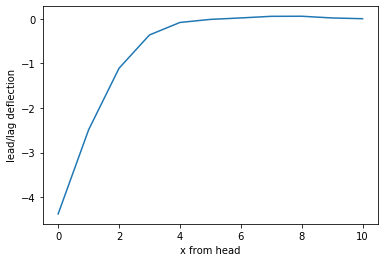

In [32]:
dz = np.polyint(d2z)
dz[-1]= (-1*np.polyval(dz, length))#boundary condition
#print(dz)
w_z = np.polyint(dz)
w_z[-1]= (-1*np.polyval(w_z, length))
w_z_pts=[]
#print(w_z)
for i in xs:
    w_z_pts.append(w_z[0]*i**8+w_z[1]*i**7+w_z[2]*i**6+w_z[3]*i**5+w_z[4]*i**4+w_z[5]*i**3+w_z[6]*i**2+w_z[7]*i+w_z[8])


plt.xlabel("x from head")
plt.ylabel("lead/lag deflection")
plt.plot(xs, w_z_pts);
print(w_z_pts)
    